In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')
%matplotlib inline

**[Data](https://www.kaggle.com/harlfoxem/housesalesprediction) import**

In [2]:
data = np.loadtxt('/home/oleg/Programming/Python Code/datasets/kc_house_data.csv',
                    skiprows =1, delimiter =',' ,dtype = float, 
                    usecols = (2, 5))


**Preprocessing of raw data**

In [3]:
x = data[:,1]
print(x.shape)
m = x.size
x = x.reshape((m,1))/1000
y = data[:,0].reshape((m,1))/1000000
x0 = np.ones((x.shape[0], 1))
x = np.hstack((x0, x))


(21613,)


**Calculate cost function **

In [4]:
def cost_func(x, y, theta=[[0], [0]]):
    h = x.dot(theta)
    J = 1 / (2 * m) * np.sum(np.square(h - y))
    return(J)
cost_func(x, y)

0.21323567155119766

**Gradient descent realization**

In [5]:
def gradient_descent(x, y, theta=[[0], [0]], 
                     learning_rate = 0.01, num_iters = 5000):
    m = y.size
    J_history = np.zeros(num_iters)
    for iter in np.arange(num_iters):
        h = x.dot(theta)
        theta = theta - learning_rate * (1 / m) * (x.T.dot(h - y))
        J_history[iter] = cost_func(x, y, theta)
    return(theta, J_history)

In [6]:
%time
theta, cost = gradient_descent(x, y)
theta


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.53 µs


array([[-0.04345638],
       [ 0.28057214]])

**Visualization and comparison with sklearn**

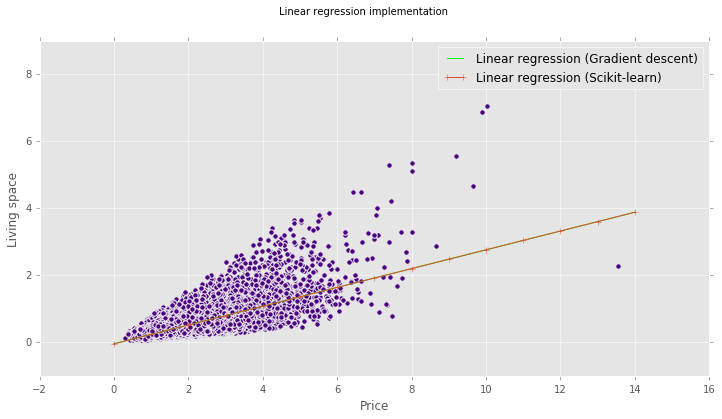

In [7]:
X = np.arange(0, 15)
Y = theta[0] + theta[1] * X

regr = LinearRegression()
regr.fit(x[:, 1].reshape(-1, 1), y.ravel())

fig, axes = plt.subplots(figsize = (12, 6))
axes.scatter(x[:, 1], y, s = 30, c = 'indigo', linewidths = 1)
axes.plot(X, Y, label='Linear regression (Gradient descent)', 
          c = 'lime')
axes.plot(X, regr.intercept_ + regr.coef_ * X, 
          label='Linear regression (Scikit-learn)', marker = '+')
axes.legend(loc = 'best')
axes.set_xlabel('Price')
axes.set_ylabel('Living space')
fig.suptitle('Linear regression implementation')